Wego! 

Questions to answer - 

3. How closely does lateness (ADHERENCE) correlate to headway?

8. Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport. 

Kala's notes - 

Headway = time between bus arrivals

Gapping = too far apart (generally focused on this issue)

Bunching = too close together (also an indicator of an issue)

Trip edge = 1 = 1 start of route 2 = 2 end of route

Trip id = one trip that will have a start and an end

The start of the next trip will begin at the end of the last one

Scheduled headway is null for the end of the tip

Headwy dev negative means it was too close to previous bus, positive too far

Too close < 50% of scheduled headway

Gapped = > 50% of scheduled headway

Headway is always between bus in front of it and the current bus

Adherence negative means bus was early, positive means late

Trip edge 2 - there are 387,235 results (final stops)
headway_dev - there are 474,368 nulls 
scheduled_hdway - there are 432,294 nulls


2.2% of nulls were deemed "unintentional" 45,108 vs. 1,981,715

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
bnaweather = pd.read_csv('../data/bna_weather.csv')

In [3]:
headwaydata = pd.read_csv('../data/Headway Data.csv')

In [4]:
headwaydata.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [5]:
headwaydata.tail()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,MCC4_20,3.0,2,36.167091,-86.781923,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MLKS,10.0,1,36.161008,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,MCC5_11,4.0,2,36.167091,-86.781923,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MEIG,7.0,1,36.176017,-86.760399,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,0,0,1,0,0.0,0,2,19.366666
1981714,120221101,1,91057882,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,MCC4_20,2.0,2,36.167091,-86.781923,15:30:00,15:26:05,15:27:46,2.233333,NaN,NaN,NaN,0,0,1,0,NaN,0,3,1.683333


In [6]:
headwaydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [7]:
bnaweather.shape

(9739, 46)

In [8]:
headwaydata.shape

(1981715, 30)

In [9]:
headwaydata.isna().sum()

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE              41
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME           54383
ACTUAL_DEPARTURE_TIME         54430
ADHERENCE                     54430
SCHEDULED_HDWY               432294
ACTUAL_HDWY                  473824
HDWY_DEV                     474368
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED    402647
IS_RELIEF                   

In [10]:
headwaydata.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,HBHS,4.0,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,21BK,3.0,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,MCC5_9,2.0,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MLKS,7.0,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,MCC5_11,5.0,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [11]:
headwaydata['HDWY_DEV'].describe()

count    1.507347e+06
mean     3.647395e-01
std      6.579797e+00
min     -2.220667e+02
25%     -1.883334e+00
50%      0.000000e+00
75%      1.966666e+00
max      1.054617e+03
Name: HDWY_DEV, dtype: float64

KEEPING ONLY THE COLUMNS WE THINK ARE IMPORTANT

In [12]:
headwaydata = headwaydata.filter(['DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV'], axis=1)

In [13]:
headwaydata.head()

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,7.0,1,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,5.0,2,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN


In [14]:
##see a route on the day it ran

# r55 = headwaydata.loc[(headwaydata['DATE'] == '2021-11-01') & (headwaydata['ROUTE_ABBR'] == 55)]
# r55 - what i had written

r55 = headwaydata[(headwaydata['DATE'] == '2021-11-01') & 
         (headwaydata['ROUTE_STOP_SEQUENCE'] == 10.0) & 
         (headwaydata['ROUTE_ABBR'] == 55) & 
         (headwaydata['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN')].sort_values('ACTUAL_ARRIVAL_TIME')
r55

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
3320,2021-11-01,55,5500,1716,300293,TO DOWNTOWN,10.0,1,04:22:00,04:14:12,04:22:48,-0.800000,NaN,NaN,NaN
3408,2021-11-01,55,5501,557,300347,TO DOWNTOWN,10.0,1,04:47:00,04:39:44,04:47:37,-0.616666,25.0,24.816666,-0.183334
3519,2021-11-01,55,5502,329,300398,TO DOWNTOWN,10.0,1,05:07:00,05:00:06,05:07:37,-0.616666,20.0,20.000000,0.000000
3642,2021-11-01,55,5503,1228,300442,TO DOWNTOWN,10.0,1,05:19:00,05:13:07,05:22:12,-3.200000,12.0,14.583333,2.583333
3714,2021-11-01,55,5504,1158,300498,TO DOWNTOWN,10.0,1,05:28:00,05:19:17,05:29:32,-1.533333,9.0,7.333333,-1.666667
3822,2021-11-01,55,5505,1202,300546,TO DOWNTOWN,10.0,1,05:38:00,05:33:58,05:39:03,-1.050000,10.0,9.516666,-0.483334
3930,2021-11-01,55,5506,2109,300586,TO DOWNTOWN,10.0,1,05:46:00,05:36:22,05:48:32,-2.533333,8.0,9.483333,1.483333
4002,2021-11-01,55,5507,1743,300604,TO DOWNTOWN,10.0,1,05:54:00,05:49:06,05:55:43,-1.716666,8.0,7.183333,-0.816667
3332,2021-11-01,55,5500,1716,300294,TO DOWNTOWN,10.0,1,06:04:00,05:53:07,06:04:49,-0.816666,10.0,9.100000,-0.900000
4110,2021-11-01,55,5508,2055,300616,TO DOWNTOWN,10.0,1,06:13:00,06:00:26,06:14:45,-1.750000,9.0,9.933333,0.933333


In [15]:
##kevin idea - 
# route_55_1101 = hwdata1[(hwdata1['DATE'] == '2021-11-01') & 
#         (hwdata1['ROUTE_STOP_SEQUENCE'] == 10.0) & 
#         (hwdata1['ROUTE_ABBR'] == 55) & 
#         (hwdata1['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN')].sort_values('ACTUAL_ARRIVAL_TIME')


In [16]:
headwaydata.ROUTE_ABBR.value_counts()

55    362259
56    355098
52    291150
23    250787
50    249880
3     216446
22    153074
7     103021
Name: ROUTE_ABBR, dtype: int64

How closely does lateness (ADHERENCE) correlate to headway?

headwaydata['ADHERENCE'].corr(headwaydata['ACTUAL_HDWY']) - run below

In [17]:
adhcorr = headwaydata.filter(['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV'], axis=1)
adhcorr


,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,297750,TO DOWNTOWN,4.0,1,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,297750,TO DOWNTOWN,3.0,0,-3.350000,14.0,17.333333,3.333333
2,2021-11-01,7,297750,TO DOWNTOWN,2.0,2,-20.183333,NaN,NaN,NaN
3,2021-11-01,50,297749,TO DOWNTOWN,7.0,1,-0.283333,NaN,NaN,NaN
4,2021-11-01,50,297749,TO DOWNTOWN,5.0,2,10.016666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,329980,TO DOWNTOWN,3.0,2,-2.733333,NaN,NaN,NaN
1981711,2022-11-01,50,330003,TO DOWNTOWN,10.0,1,12.900000,10.0,7.633333,-2.366667
1981712,2022-11-01,50,330003,TO DOWNTOWN,4.0,2,26.733333,NaN,NaN,NaN
1981713,2022-11-01,56,330011,TO DOWNTOWN,7.0,1,0.966666,0.0,NaN,NaN


In [18]:
r55.corr()
##is this helpful at all?

,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
ROUTE_ABBR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCK_ABBR,NaN,1.000000,0.420471,0.963527,NaN,NaN,-0.425440,-0.178689,-0.069271,0.344782
OPERATOR,NaN,0.420471,1.000000,0.414252,NaN,NaN,-0.344972,0.057529,0.112678,0.195512
TRIP_ID,NaN,0.963527,0.414252,1.000000,NaN,NaN,-0.402549,-0.171719,-0.073706,0.307127
ROUTE_STOP_SEQUENCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRIP_EDGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADHERENCE,NaN,-0.425440,-0.344972,-0.402549,NaN,NaN,1.000000,0.035995,-0.173046,-0.703674
SCHEDULED_HDWY,NaN,-0.178689,0.057529,-0.171719,NaN,NaN,0.035995,1.000000,0.955544,-0.003490
ACTUAL_HDWY,NaN,-0.069271,0.112678,-0.073706,NaN,NaN,-0.173046,0.955544,1.000000,0.291511
HDWY_DEV,NaN,0.344782,0.195512,0.307127,NaN,NaN,-0.703674,-0.003490,0.291511,1.000000


In [19]:
##how to show correlation between two columns

##Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])

In [20]:
headwaydata['ADHERENCE'].corr(headwaydata['ACTUAL_HDWY'])

-0.08644095025323575

In [21]:
##steven's - 

# late_bus=headway_data[headway_data['HDWY_DEV']>0]
# early_bus=headway_data[headway_data['HDWY_DEV']<0]
# on_time=headway_data[headway_data['HDWY_DEV']==0]

In [22]:
# shape without dropping nulls in HDWY is (1505410, 15)
# shape after nulls drop is (1306754, 15)

late = headwaydata[headwaydata['ADHERENCE']<0]
late.head(20)

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,7.0,1,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
6,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,11.0,0,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN
7,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,6.0,0,04:54:00,04:55:00,04:55:00,-1.000000,NaN,NaN,NaN
9,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,4.0,1,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN
10,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,6.0,0,05:25:00,05:25:52,05:25:52,-0.866666,NaN,NaN,NaN
11,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,15.0,2,05:32:00,05:33:39,05:33:39,-1.650000,NaN,NaN,NaN
12,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,15.0,1,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667


In [23]:
latenonull = late.dropna()

In [24]:
latenonull.head()

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
12,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,15.0,1,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667
13,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,11.0,0,05:46:00,05:48:15,05:48:15,-2.250000,35.0,35.866666,0.866666
14,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,6.0,0,05:54:00,05:54:23,05:54:23,-0.383333,15.0,13.983333,-1.016667


In [25]:
latenonull.shape

(1306754, 15)

In [26]:
# def unique(operator):
#     unique_operator= []
#     for i in operator:
#         if i not in unique_operator:
#             unique_operator.append(i)
#     for i in unique_operator:
#         print (i),
        
# operator = headwaydata['OPERATOR']
# unique(operator)

# ^ from steven

In [27]:
late.shape

##1,306,754 - steven's greater than 0 without nulls

(1505410, 15)

In [28]:
early = headwaydata[headwaydata['ADHERENCE']>0]
early.head()

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
4,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,5.0,2,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
5,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,15.0,1,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN
8,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,4.0,2,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN
15,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,4.0,2,06:10:00,06:05:39,06:05:39,4.350000,NaN,NaN,NaN
18,2021-11-01,22,2200,1352,298151,FROM DOWNTOWN,15.0,2,06:35:00,06:34:28,06:34:28,0.533333,NaN,NaN,NaN


In [29]:
early.shape

(415154, 15)

In [30]:
##steven's early without nulls - 749,129

In [31]:
ontime = headwaydata[headwaydata['ADHERENCE'] == 0]
ontime.head()

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
71,2021-11-01,22,2200,1194,298160,FROM DOWNTOWN,6.0,0,15:23:00,15:23:00,15:23:00,0.0,10.0,10.916666,0.916666
465,2021-11-01,22,2211,1383,298429,TO DOWNTOWN,7.0,1,16:11:00,16:11:00,16:11:00,0.0,25.0,24.983333,-0.016667
615,2021-11-01,23,2301,306,298474,FROM DOWNTOWN,2.0,0,12:33:00,12:33:00,12:33:00,0.0,12.0,12.016666,0.016666
1110,2021-11-01,23,2312,2322,298666,FROM DOWNTOWN,1.0,1,21:35:00,21:22:44,21:35:00,0.0,20.0,19.600000,-0.400000
1387,2021-11-01,3,301,1020,299012,TO DOWNTOWN,6.0,1,09:03:00,08:49:36,09:03:00,0.0,28.0,26.366666,-1.633334


In [32]:
ontime.shape

(6721, 15)

In [33]:
##steven's ontime - 5276

Create 2 DF. One for adherence, one for headway. 

intentional null - anything with a trip edge of 2 since it's the last bus - count of trip edge 2 with null scheduled_hdwy is 387,186

unintentional is anything else

make notes/percentages of what we drop and make a note of it. 


Trip edge 2 - there are 387,235 results (final stops)
headway_dev - there are 474,368 nulls 
scheduled_hdway - there are 432,294 nulls

In [34]:
tripedge2 = headwaydata[headwaydata['TRIP_EDGE'] == 2]
tripedge2.head()
tripedge2.shape

(387235, 15)

In [35]:
# tripedge2 = headwaydata[headwaydata['TRIP_EDGE'] == 2] & (headwaydata['SCHEDULED_HDWY'] == 'NaN')
# tripedge2 - MEMORY ERROR

In [36]:
tripedgetest = headwaydata.loc[headwaydata['TRIP_EDGE'] == 2, 'SCHEDULED_HDWY']
tripedgetest.isnull().sum()

387186

In [37]:
tripedgetest = headwaydata.loc[headwaydata['TRIP_EDGE'] == 2, 'SCHEDULED_HDWY']
tripedgetest.isnull().sum()

387186

In [38]:
tripedgetest = headwaydata.loc[headwaydata['TRIP_EDGE'] != 2, 'SCHEDULED_HDWY']
tripedgetest.isnull().sum()

45108

In [39]:
tripedgetest.dropna()
tripedgetest

0          14.0
1          14.0
3           NaN
5           NaN
6           NaN
           ... 
1981705     NaN
1981707     0.0
1981709     NaN
1981711    10.0
1981713     0.0
Name: SCHEDULED_HDWY, Length: 1594480, dtype: float64

In [40]:
tripedgetest.isnull().sum()

45108

In [41]:
headwaydata.isnull().sum()

DATE                          0
ROUTE_ABBR                    0
BLOCK_ABBR                    0
OPERATOR                      0
TRIP_ID                       0
ROUTE_DIRECTION_NAME          0
ROUTE_STOP_SEQUENCE          41
TRIP_EDGE                     0
SCHEDULED_TIME                0
ACTUAL_ARRIVAL_TIME       54383
ACTUAL_DEPARTURE_TIME     54430
ADHERENCE                 54430
SCHEDULED_HDWY           432294
ACTUAL_HDWY              473824
HDWY_DEV                 474368
dtype: int64

In [42]:
##387,186 intentional nulls - 
##45,108 uninentional

##ONLY DROP UNINTENTIONAL!!!

In [43]:
# shape without dropping nulls in HDWY is (1505410, 15)
# shape after nulls drop is (1306754, 15)

late = headwaydata[headwaydata['ADHERENCE']<0]
late.head(20)

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,7.0,1,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
6,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,11.0,0,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN
7,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,6.0,0,04:54:00,04:55:00,04:55:00,-1.000000,NaN,NaN,NaN
9,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,4.0,1,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN
10,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,6.0,0,05:25:00,05:25:52,05:25:52,-0.866666,NaN,NaN,NaN
11,2021-11-01,22,2200,1352,298162,FROM DOWNTOWN,15.0,2,05:32:00,05:33:39,05:33:39,-1.650000,NaN,NaN,NaN
12,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,15.0,1,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667


In [44]:
lateclean = late.dropna()
lateclean.shape

(1306754, 15)

In [45]:
latein = headwaydata[~((headwaydata['TRIP_EDGE']!=2)&(headwaydata['SCHEDULED_HDWY'].isna()))]
latein

,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
4,2021-11-01,50,1704,2088,297749,TO DOWNTOWN,5.0,2,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
8,2021-11-01,22,2200,1352,298143,TO DOWNTOWN,4.0,2,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,9302,2355,329980,TO DOWNTOWN,3.0,2,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN
1981711,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,10.0,1,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,2022-11-01,50,9950,1880,330003,TO DOWNTOWN,4.0,2,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN
1981713,2022-11-01,56,9975,1922,330011,TO DOWNTOWN,7.0,1,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN


In [46]:
##latein['ADHERENCE'].corr(headwaydata['HDWY_DEV'])

In [47]:
##Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])

##latein['ADHERENCE'].corr(latein['HDWY_DEV'])

In [48]:
# corr = latein.corr()

# corr.style.background_gradient(cmap='coolwarm')

In [49]:
corr2 = latein.filter(['SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV'], axis=1)
corr2

,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,14:10:00,14:12:00,-2.000000,14.0,15.983333,1.983333
1,14:20:00,14:23:21,-3.350000,14.0,17.333333,3.333333
2,14:39:00,14:59:11,-20.183333,NaN,NaN,NaN
4,15:27:00,15:16:59,10.016666,NaN,NaN,NaN
8,05:10:00,05:05:26,4.566666,NaN,NaN,NaN
...,...,...,...,...,...,...
1981710,15:18:00,15:20:44,-2.733333,NaN,NaN,NaN
1981711,15:20:00,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,15:37:00,15:10:16,26.733333,NaN,NaN,NaN
1981713,15:20:00,15:19:02,0.966666,0.0,NaN,NaN


In [50]:
corr2

,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,14:10:00,14:12:00,-2.000000,14.0,15.983333,1.983333
1,14:20:00,14:23:21,-3.350000,14.0,17.333333,3.333333
2,14:39:00,14:59:11,-20.183333,NaN,NaN,NaN
4,15:27:00,15:16:59,10.016666,NaN,NaN,NaN
8,05:10:00,05:05:26,4.566666,NaN,NaN,NaN
...,...,...,...,...,...,...
1981710,15:18:00,15:20:44,-2.733333,NaN,NaN,NaN
1981711,15:20:00,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,15:37:00,15:10:16,26.733333,NaN,NaN,NaN
1981713,15:20:00,15:19:02,0.966666,0.0,NaN,NaN


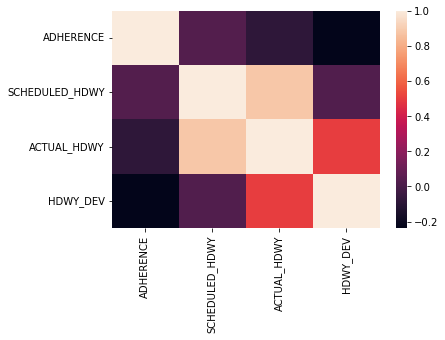

In [51]:
sns.heatmap(corr2.corr());

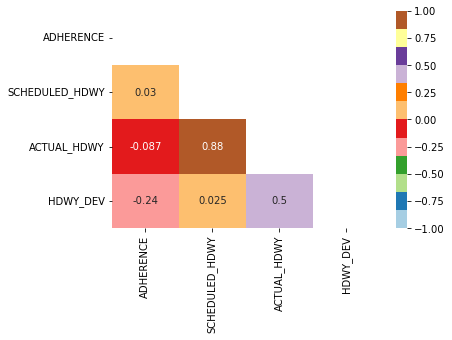

In [52]:
mask= np.triu(np.ones_like(corr2.corr()))
sns.heatmap(corr2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Paired')
               
plt.savefig("Plotting_correlation_HeatMap.jpg")

In [53]:
avadherence = corr2['ADHERENCE'].abs()
avadherence

0           2.000000
1           3.350000
2          20.183333
4          10.016666
8           4.566666
             ...    
1981710     2.733333
1981711    12.900000
1981712    26.733333
1981713     0.966666
1981714     2.233333
Name: ADHERENCE, Length: 1936607, dtype: float64

In [54]:
corr2

,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,14:10:00,14:12:00,-2.000000,14.0,15.983333,1.983333
1,14:20:00,14:23:21,-3.350000,14.0,17.333333,3.333333
2,14:39:00,14:59:11,-20.183333,NaN,NaN,NaN
4,15:27:00,15:16:59,10.016666,NaN,NaN,NaN
8,05:10:00,05:05:26,4.566666,NaN,NaN,NaN
...,...,...,...,...,...,...
1981710,15:18:00,15:20:44,-2.733333,NaN,NaN,NaN
1981711,15:20:00,15:07:06,12.900000,10.0,7.633333,-2.366667
1981712,15:37:00,15:10:16,26.733333,NaN,NaN,NaN
1981713,15:20:00,15:19:02,0.966666,0.0,NaN,NaN


In [55]:
corr2['Adherence Absolute Value'] = corr2['ADHERENCE'].abs()
corr2

,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,Adherence Absolute Value
0,14:10:00,14:12:00,-2.000000,14.0,15.983333,1.983333,2.000000
1,14:20:00,14:23:21,-3.350000,14.0,17.333333,3.333333,3.350000
2,14:39:00,14:59:11,-20.183333,NaN,NaN,NaN,20.183333
4,15:27:00,15:16:59,10.016666,NaN,NaN,NaN,10.016666
8,05:10:00,05:05:26,4.566666,NaN,NaN,NaN,4.566666
...,...,...,...,...,...,...,...
1981710,15:18:00,15:20:44,-2.733333,NaN,NaN,NaN,2.733333
1981711,15:20:00,15:07:06,12.900000,10.0,7.633333,-2.366667,12.900000
1981712,15:37:00,15:10:16,26.733333,NaN,NaN,NaN,26.733333
1981713,15:20:00,15:19:02,0.966666,0.0,NaN,NaN,0.966666


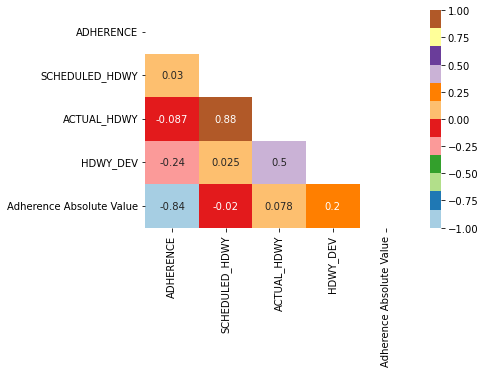

In [56]:
mask= np.triu(np.ones_like(corr2.corr()))
sns.heatmap(corr2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Paired')
               
plt.savefig("Plotting_correlation_HeatMap.jpg")

In [57]:
corr2 = corr2.filter(['Adherence Absolute Value', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV'], axis=1)

In [58]:
corr2.rename(columns={'SCHEDULED_HDWY':'Scheduled Headway', 'ACTUAL_HDWY' : 'Actual Headway', 'HDWY_DEV' : 'Headway Deviation'}, inplace=True)

In [59]:
# mask= np.triu(np.ones_like(corr2.corr()))
# sns.heatmap(corr2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Paired')
               
# plt.savefig("Plotting_correlation_HeatMap.jpg")




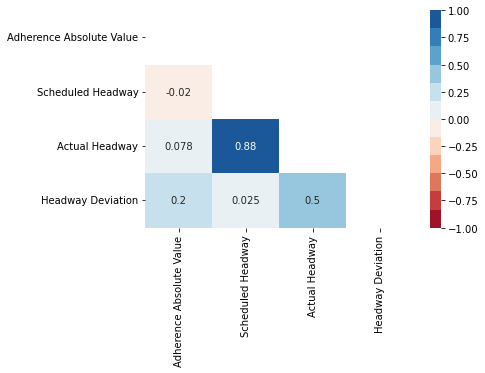

In [60]:
##Amanda approved - 

mask= np.triu(np.ones_like(corr2.corr()))
cmap=sns.color_palette('RdBu', 12)
sns.heatmap(corr2.corr(),mask=mask, vmin=-1, vmax=1, annot=True, cmap=cmap)

plt.savefig("Plotting_Correlation_HeatMap.png")

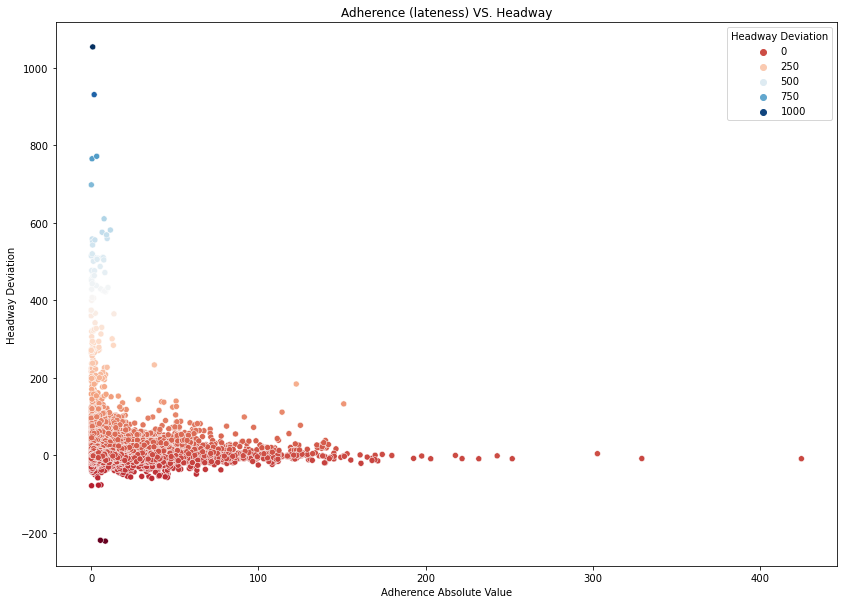

In [61]:
df=corr2
fig, ax=plt.subplots(figsize=(14,10))
sns.scatterplot(ax=ax,data=df, x = 'Adherence Absolute Value', y= 'Headway Deviation',hue='Headway Deviation',palette="RdBu")
plt.title("Adherence (lateness) VS. Headway")
plt.show()

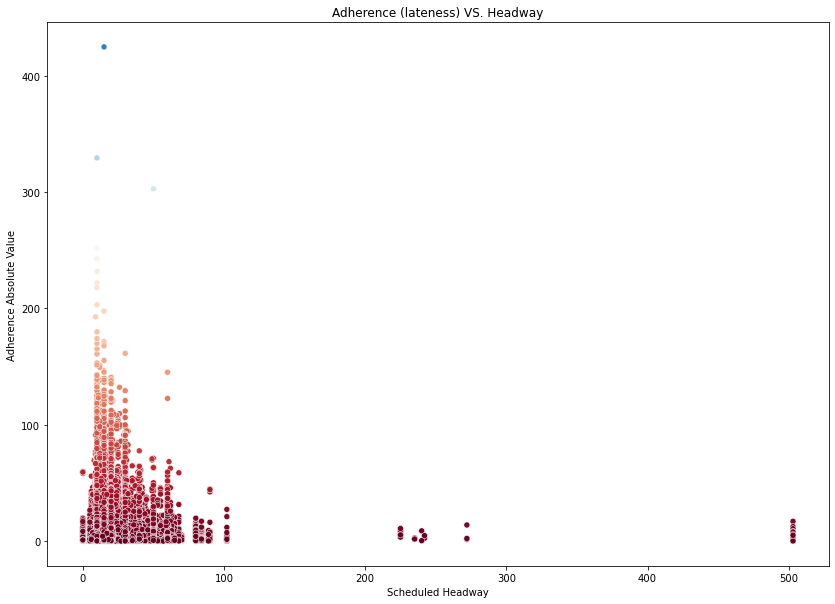

In [66]:
df=corr2
fig, ax=plt.subplots(figsize=(14,10))
sns.scatterplot(ax=ax,data=df, x = 'Scheduled Headway', y= 'Adherence Absolute Value',hue='Adherence Absolute Value',palette="RdBu")
plt.title("Adherence (lateness) VS. Headway")
ax.get_legend().remove()
plt.show()

In [70]:
corr2desc = corr2.describe()
corr2desc

,Adherence Absolute Value,Scheduled Headway,Actual Headway,Headway Deviation
count,1.885105e+06,1.549421e+06,1.507347e+06,1.507347e+06
mean,3.043058e+00,1.864981e+01,1.896702e+01,3.647395e-01
std,4.440194e+00,1.217166e+01,1.381434e+01,6.579797e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.220667e+02
25%,7.500000e-01,1.000000e+01,1.103333e+01,-1.883334e+00
50%,1.900000e+00,1.500000e+01,1.618333e+01,0.000000e+00
75%,3.850000e+00,2.000000e+01,2.306667e+01,1.966666e+00
max,5.067667e+02,5.030000e+02,1.084617e+03,1.054617e+03


In [74]:
corr2desc.loc['75%', 'Adherence Absolute Value']

3.85

In [75]:
corr2desc.loc['75%', 'Scheduled Headway']

20.0

In [77]:
IQRadh = corr2desc.loc['75%', 'Adherence Absolute Value'] - corr2desc.loc['25%', 'Adherence Absolute Value']
print(IQRadh)

3.1


In [78]:
IQRhdwy = corr2desc.loc['75%', 'Scheduled Headway'] - corr2desc.loc['25%', 'Scheduled Headway']
print(IQRhdwy)

10.0
